### Egypt Houses Price (Data Visualization)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 9]}, font_scale=1.3)
import matplotlib.pylab as pylab
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}



In [5]:
import pandas as pd 


### 1- Import The Dataset

In [6]:
df = pd.read_csv('../Final_Prediction&Recommendation/Dataset/Egyption.csv', sep = ',')

In [7]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City,Price_range
0,Apartment,4000000,3,3,160,No,11,Cash,Finished,Camp Caesar,high Price
1,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha,Mid Price
2,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City,Mid Price
3,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa,high Price
4,Apartment,1844900,4,3,222,No,1,Cash or Installment,Semi Finished,New Cairo - El Tagamoa,Mid Price


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16058 entries, 0 to 16057
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            16058 non-null  object
 1   Price           16058 non-null  int64 
 2   Bedrooms        16058 non-null  int64 
 3   Bathrooms       16058 non-null  int64 
 4   Area            16058 non-null  int64 
 5   Furnished       16058 non-null  object
 6   Level           16058 non-null  int64 
 7   Payment_Option  16058 non-null  object
 8   Delivery_Term   16058 non-null  object
 9   City            16058 non-null  object
 10  Price_range     16058 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.3+ MB


# Visualization

In [9]:
for col in df.columns:
    print(col,':',df[col].nunique())
    print(df[col].value_counts().nlargest(7))
    print('\n'+'*'*20+'\n')

Type : 8
Apartment            5686
Chalet               3705
Stand Alone Villa    2215
Town House           1891
Twin House           1463
Duplex                587
Penthouse             366
Name: Type, dtype: int64

********************

Price : 3103
3500000    223
3000000    197
2500000    193
4500000    173
2000000    166
5000000    163
1500000    163
Name: Price, dtype: int64

********************

Bedrooms : 11
3    7362
2    3371
4    3137
5    1181
1     602
6     292
7      66
Name: Bedrooms, dtype: int64

********************

Bathrooms : 11
2    5441
3    4709
4    2444
1    2224
5     911
6     236
7      57
Name: Bathrooms, dtype: int64

********************

Area : 604
120    395
125    347
150    336
200    333
100    322
110    263
170    253
Name: Area, dtype: int64

********************

Furnished : 2
No     14508
Yes     1550
Name: Furnished, dtype: int64

********************

Level : 13
0     10520
2      1502
3      1154
1      1009
4       512
12      410
5       

C:\Users\Alaa El - Masry\AppData\Local\Temp\ipykernel_13096\2067097255.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap='plasma', linewidth=.5)


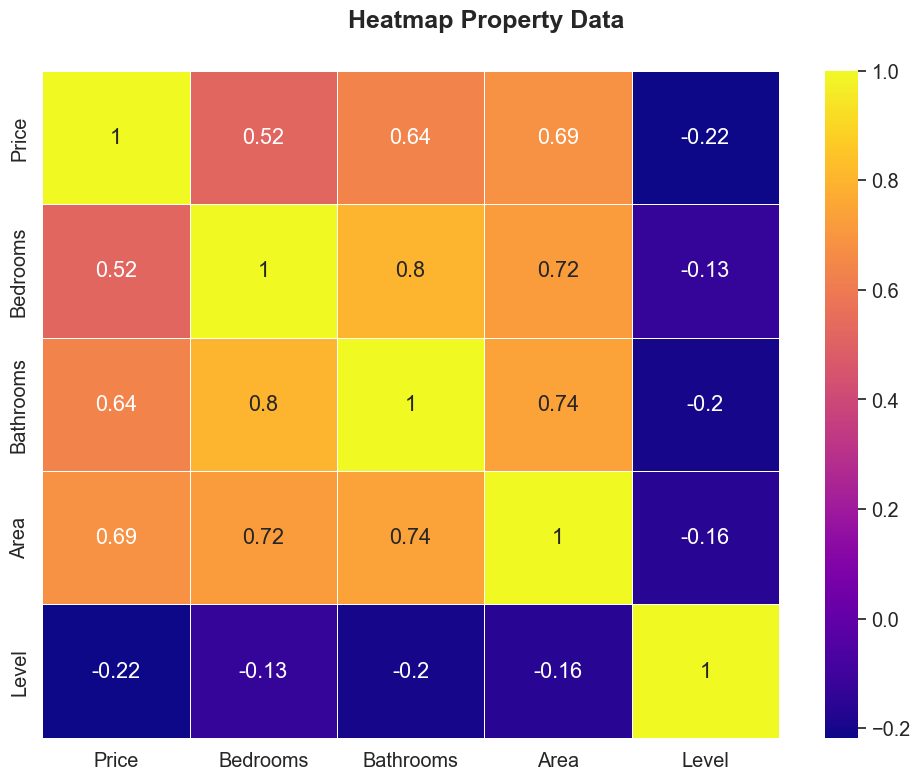

In [10]:
fig = plt.figure(figsize=(10,8))

sns.heatmap(df.corr(), annot = True, cmap='plasma', linewidth=.5)
fig.suptitle('Heatmap Property Data',fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

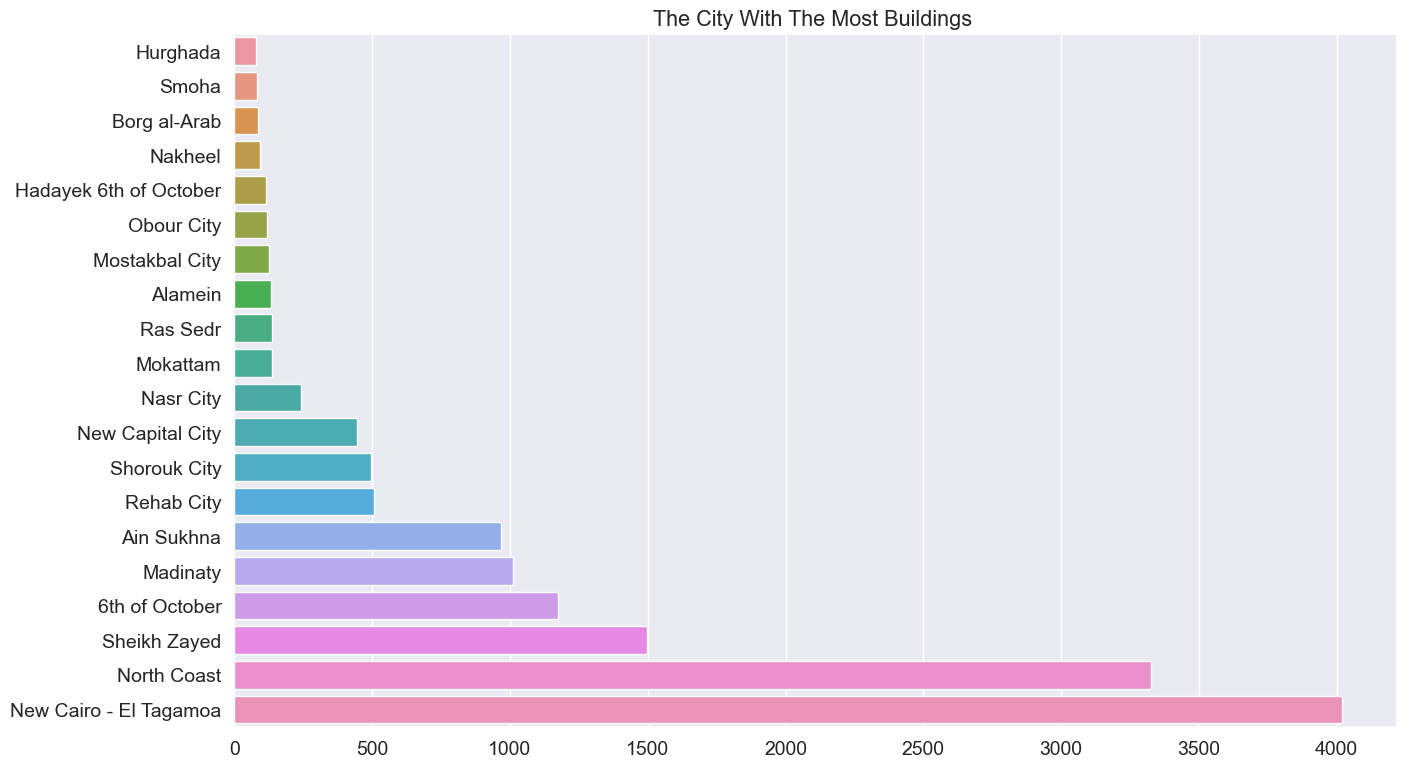

In [11]:
mp = df['City'].value_counts()[0:20].sort_values()
sns.barplot(y=mp.index,x=mp.values);
plt.title('The City With The Most Buildings ');

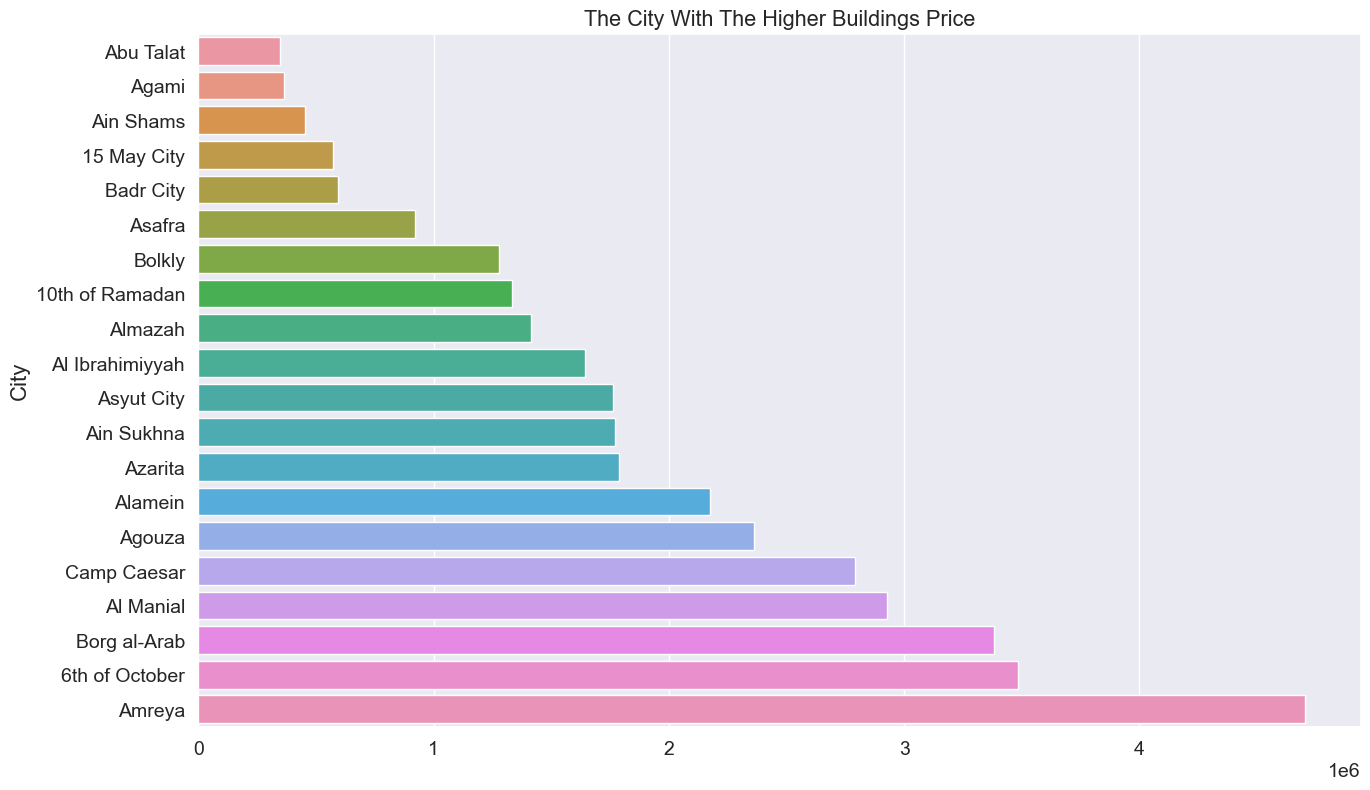

In [12]:
lpm = df.groupby('City')['Price'].mean()[0:20].sort_values()
sns.barplot(y=lpm.index,x=lpm.values);
plt.title('The City With The Higher Buildings Price');

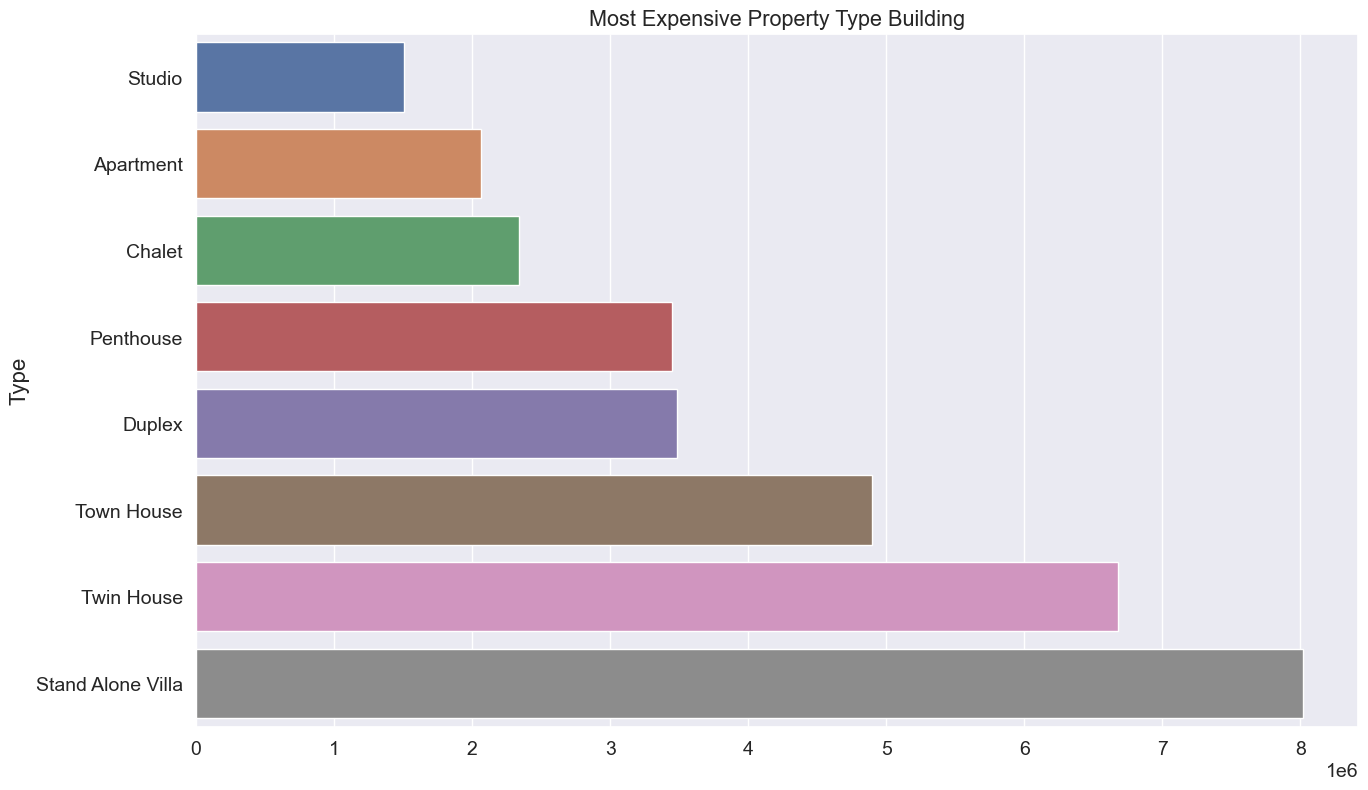

In [13]:
lpp = df.groupby('Type')['Price'].mean().sort_values()
sns.barplot(y=lpp.index,x=lpp.values);
plt.title('Most Expensive Property Type Building');

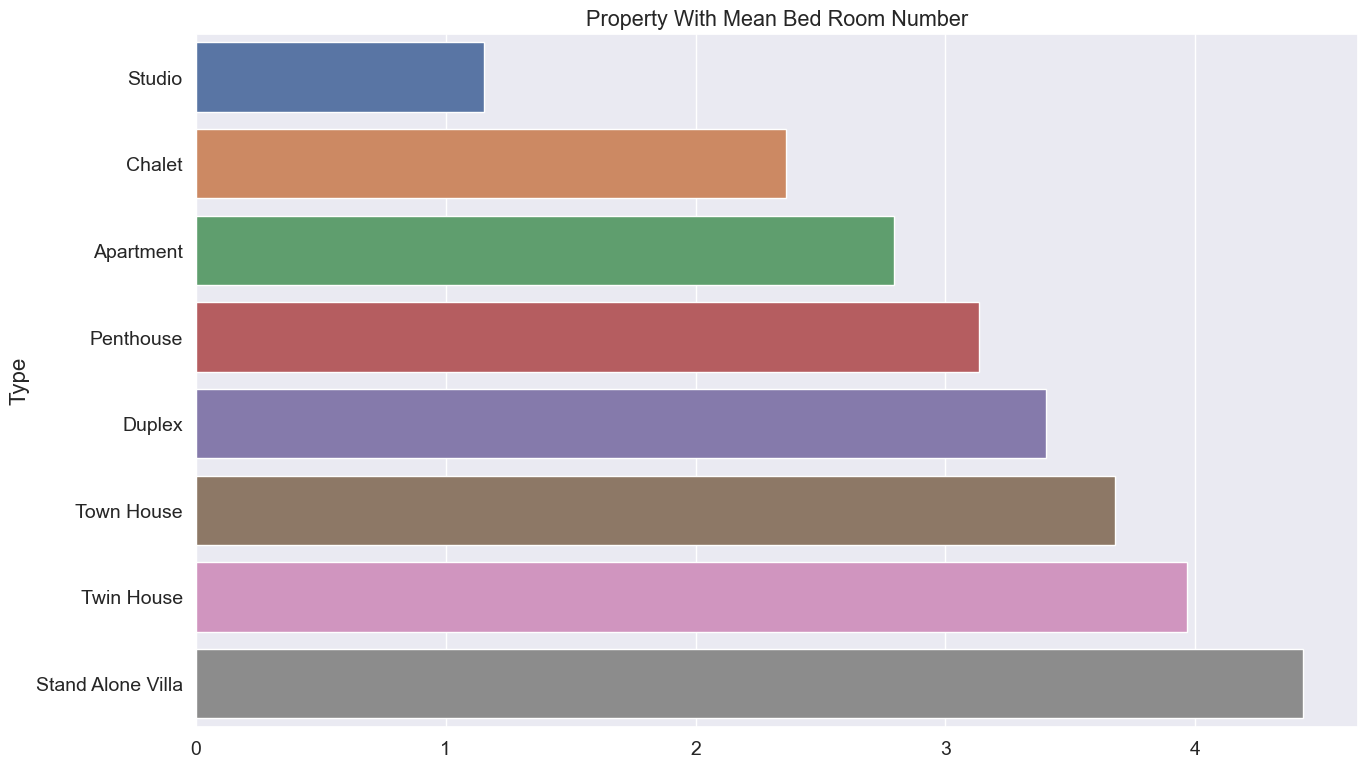

In [14]:
lpb = df.groupby('Type')['Bedrooms'].mean().sort_values()
sns.barplot(y=lpb.index,x=lpb.values);
plt.title('Property With Mean Bed Room Number');

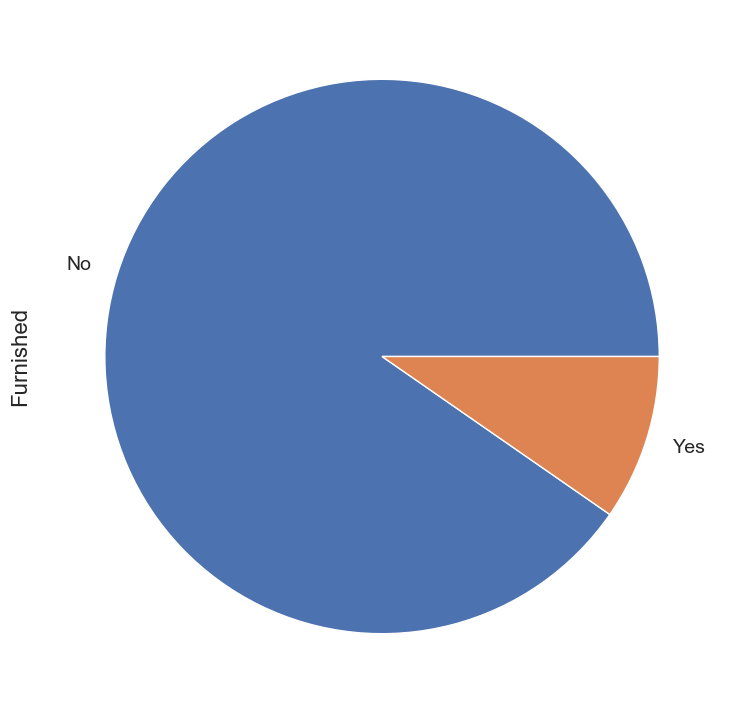

In [15]:
df['Furnished'].value_counts().plot(kind='pie');

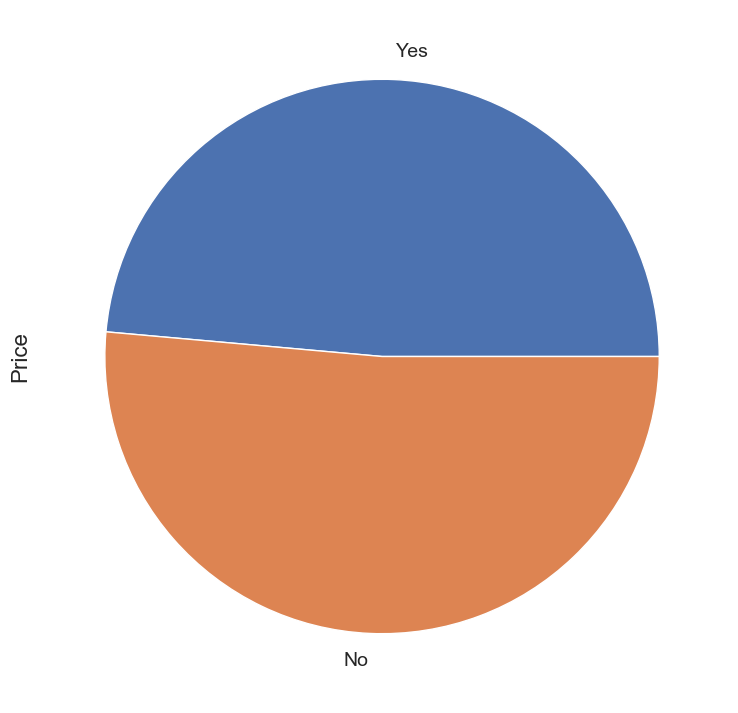

In [16]:
df.groupby('Furnished')['Price'].mean().sort_values().plot(kind='pie');

C:\Users\Alaa El - Masry\AppData\Local\Temp\ipykernel_13096\1491831069.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(ax= ax[0], data =df , x = df.groupby('Bedrooms').median().index, y = df.groupby('Bedrooms').median().Price)
C:\Users\Alaa El - Masry\AppData\Local\Temp\ipykernel_13096\1491831069.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(ax= ax[0], data =df , x = df.groupby('Bedrooms').median().index, y = df.groupby('Bedrooms').median().Price)
C:\Users\Alaa El - Masry\AppData\Local\Temp\ipykernel_13096\1491831069.py:4: FutureWarning: The default value of numeric_onl

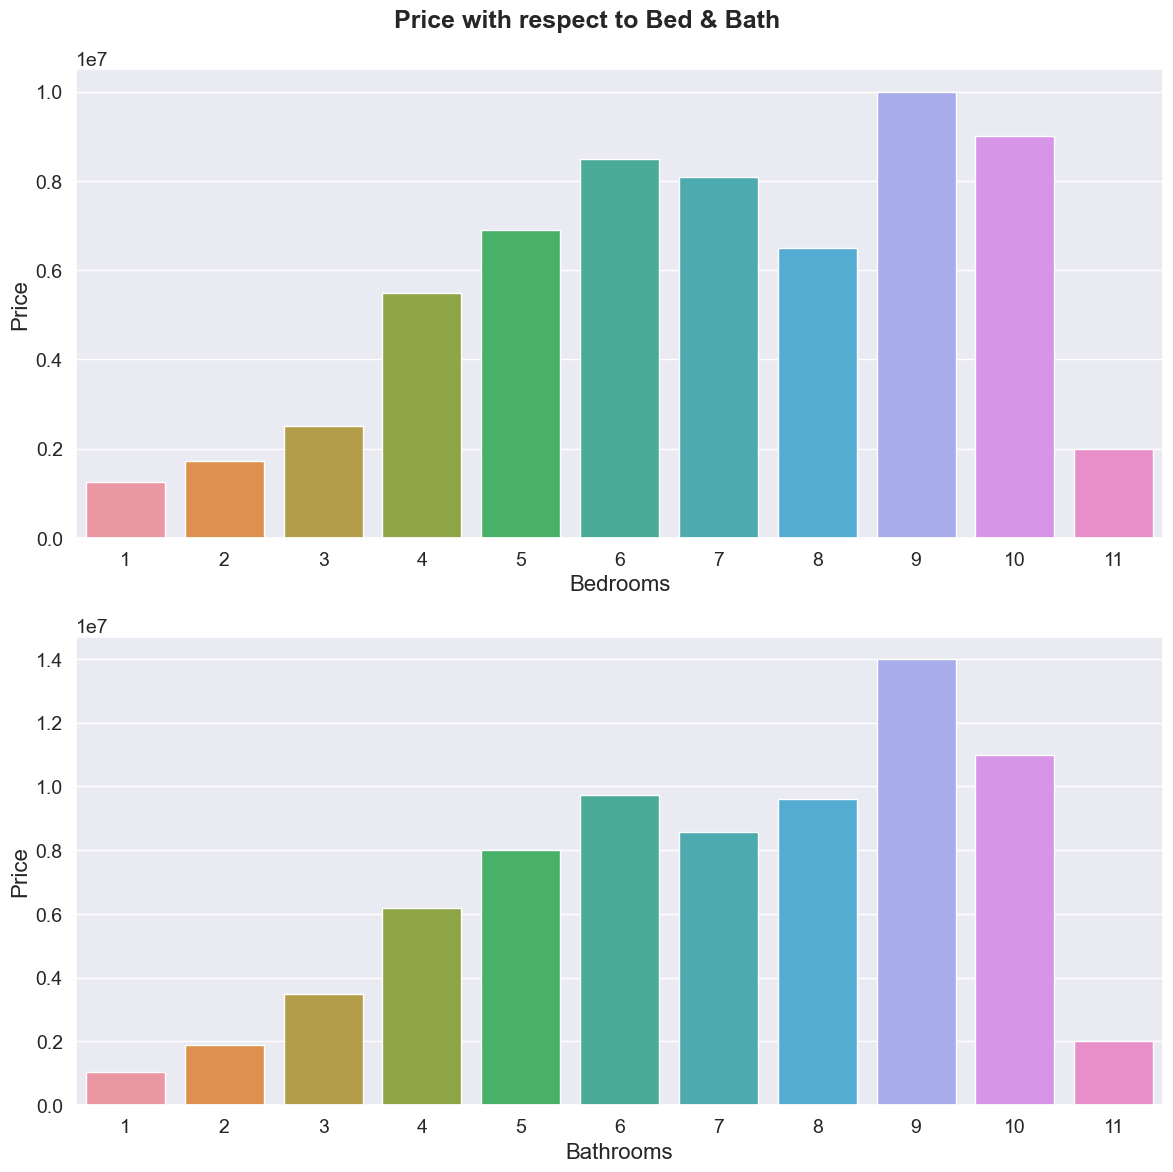

In [17]:
fig, ax = plt.subplots(2,1, figsize = (12,12))

sns.barplot(ax= ax[0], data =df , x = df.groupby('Bedrooms').median().index, y = df.groupby('Bedrooms').median().Price)
sns.barplot(ax= ax[1], data = df , x = df.groupby('Bathrooms').median().index, y = df.groupby('Bathrooms').median().Price)
fig.suptitle('Price with respect to Bed & Bath', size = 18, fontweight="bold")

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()


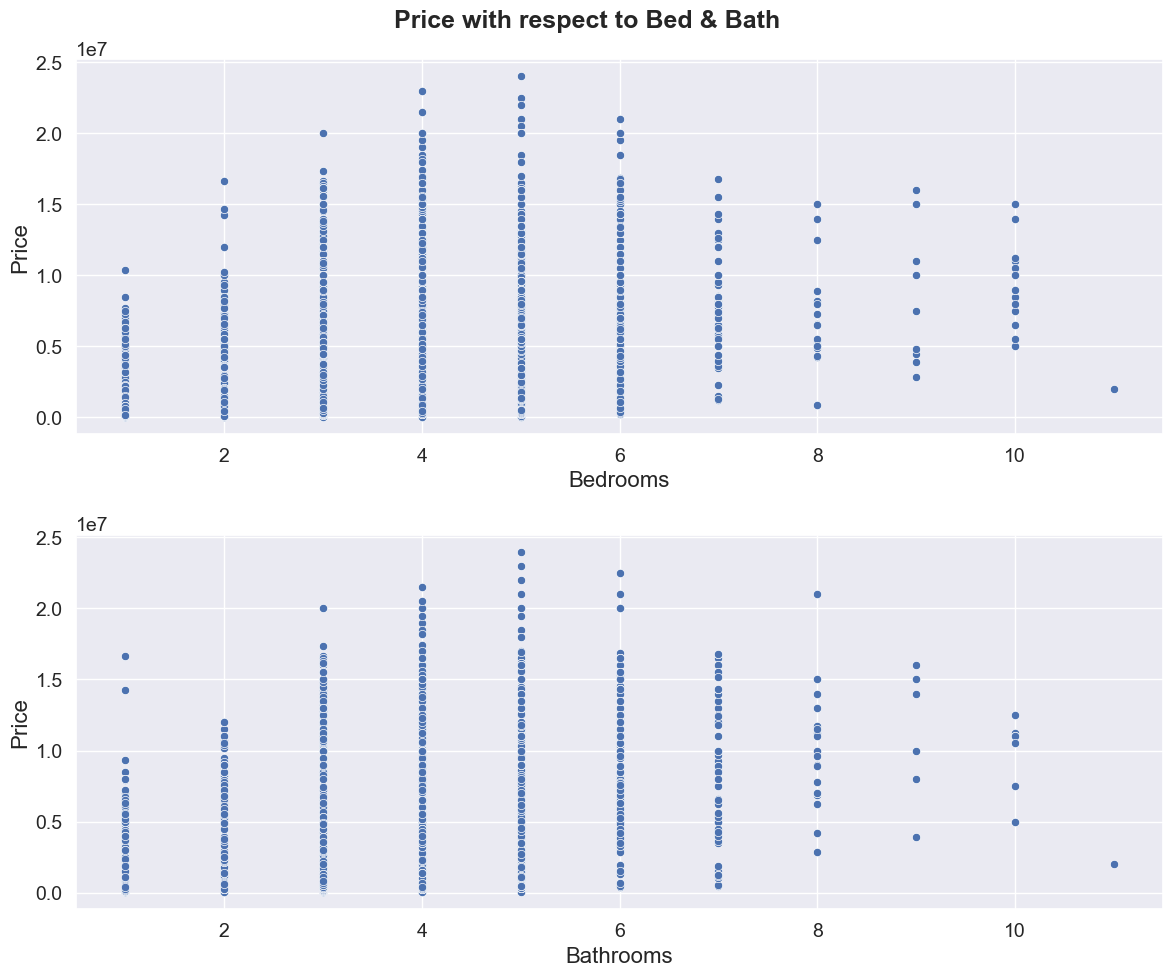

In [18]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

sns.scatterplot(ax= ax[0], data = df , x = df['Bedrooms'], y = df['Price'])
sns.scatterplot(ax= ax[1], data = df , x = df['Bathrooms'], y = df['Price'])
fig.suptitle('Price with respect to Bed & Bath', size = 18, fontweight="bold")


pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()



C:\Users\Alaa El - Masry\AppData\Local\Temp\ipykernel_13096\1127486633.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = ind ,y= vlu ,ci = None,order = ind);


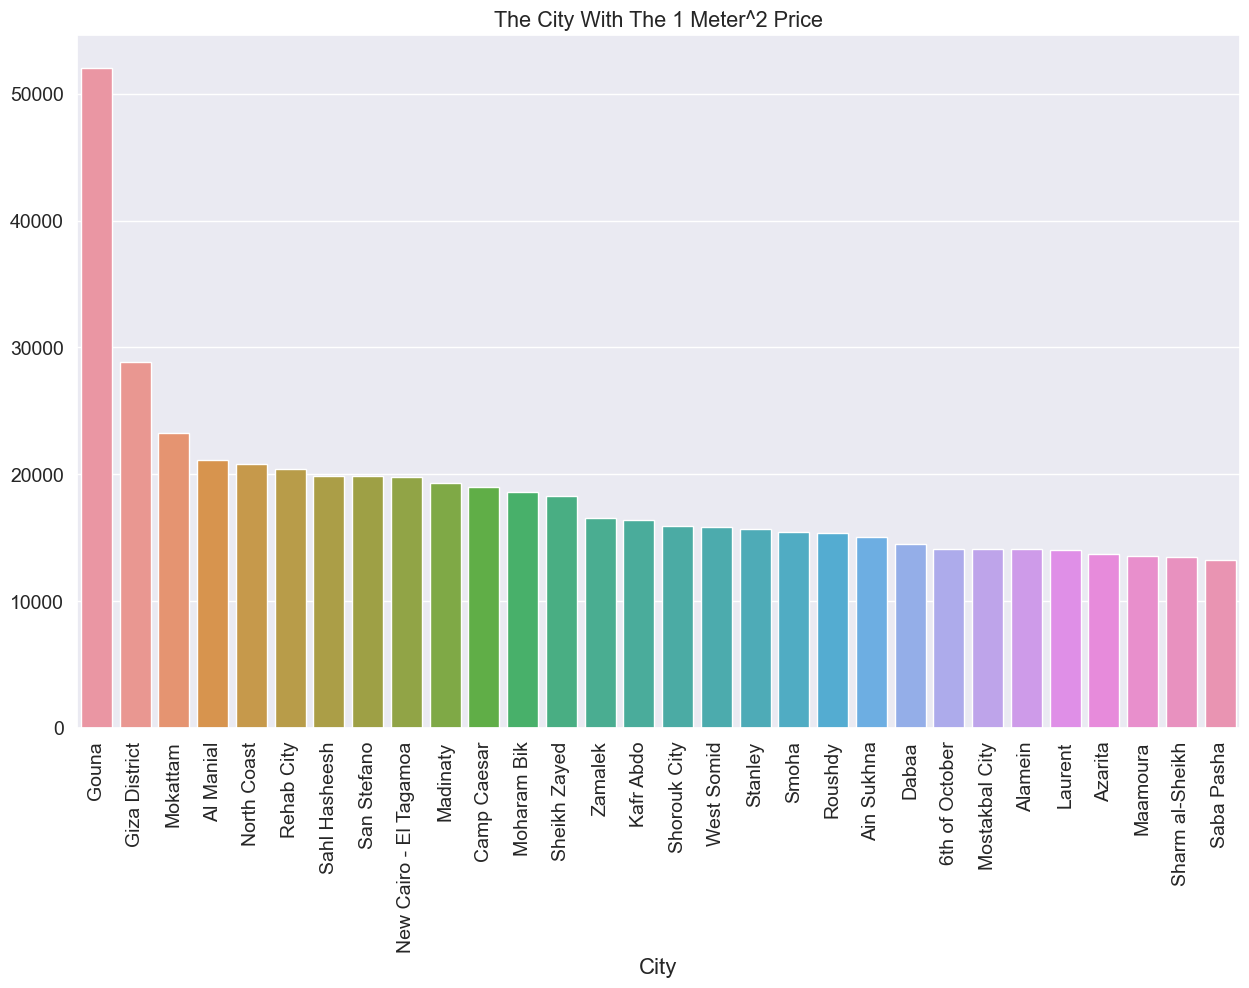

In [19]:
ind=(df.groupby('City')['Price'].sum()/df.groupby('City')['Area'].sum()).sort_values(ascending=False)[0:30].index
vlu=(df.groupby('City')['Price'].sum()/df.groupby('City')['Area'].sum()).sort_values(ascending=False)[0:30].values
sns.barplot(data = df, x = ind ,y= vlu ,ci = None,order = ind);
plt.xticks(rotation=90);
plt.title('The City With The 1 Meter^2 Price');

C:\Users\Alaa El - Masry\AppData\Local\Temp\ipykernel_13096\3014525218.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data= df, x= df.groupby('Level').median().index, y= df.groupby('Level').median().Price, palette= 'muted')
C:\Users\Alaa El - Masry\AppData\Local\Temp\ipykernel_13096\3014525218.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data= df, x= df.groupby('Level').median().index, y= df.groupby('Level').median().Price, palette= 'muted')


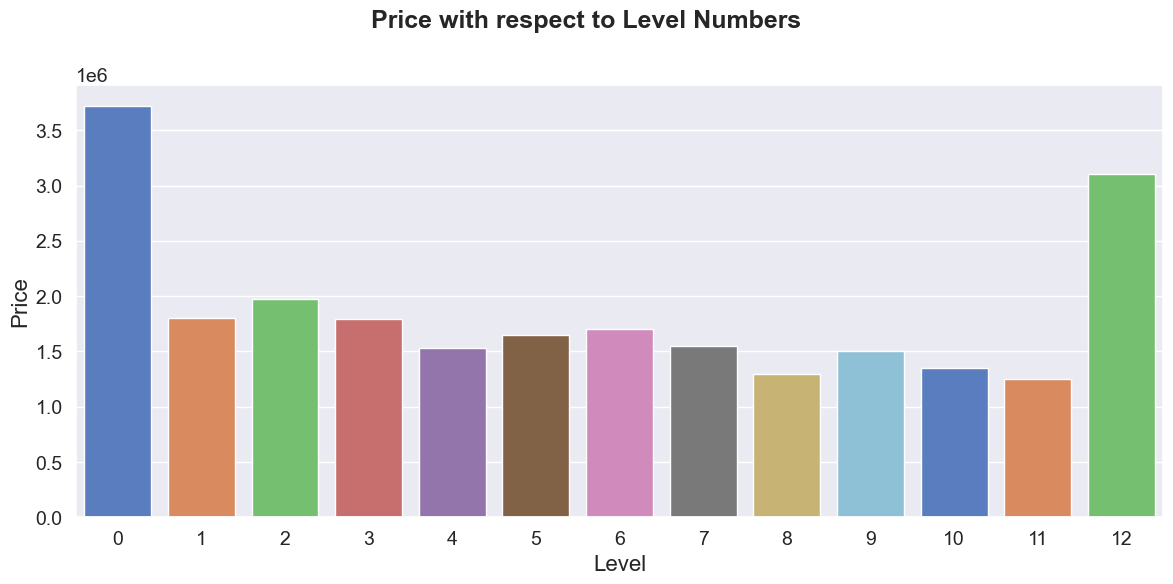

In [20]:
fig = plt.figure(figsize=(12,6))
params = {'xtick.labelsize':'8','ytick.labelsize':'14','axes.labelsize':'16'}

sns.barplot(data= df, x= df.groupby('Level').median().index, y= df.groupby('Level').median().Price, palette= 'muted')
fig.suptitle('Price with respect to Level Numbers', fontsize= 18, fontweight="bold")

pylab.rcParams.update(params)
fig.tight_layout()
plt.show()



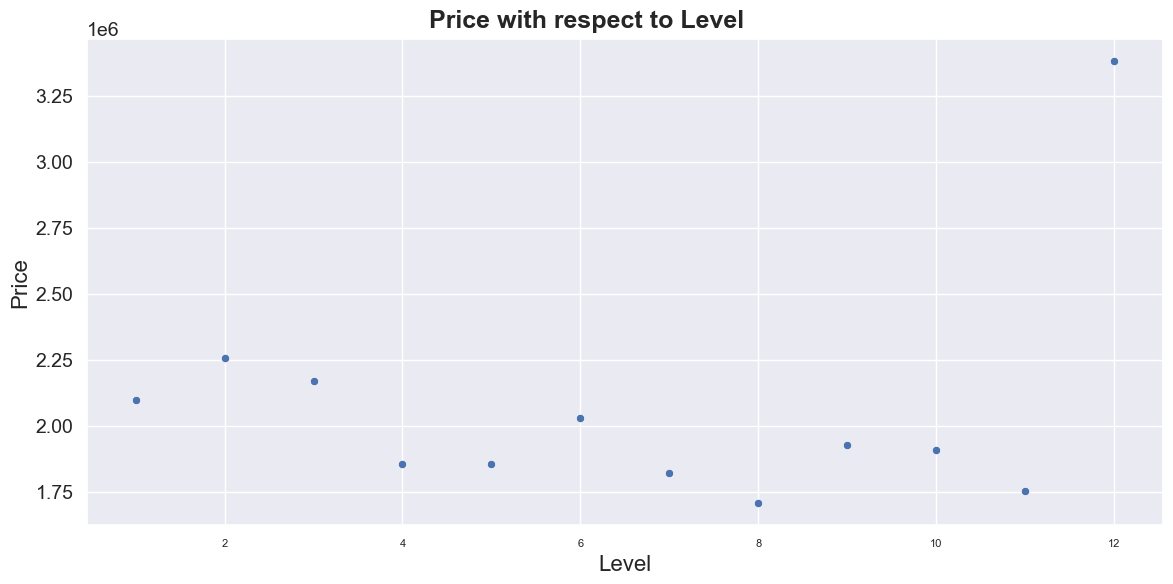

In [21]:
fig = plt.figure(figsize=(12,6))

group_full = df.groupby('Level')['Price'].mean()
group = group_full.reset_index()
group = group[group['Level'] > 0]
group = group[group['Level'] < 60]

x = group['Level']
y = group['Price']
fig.suptitle('Price with respect to Level', fontsize= 18 , fontweight='bold')
sns.scatterplot(x=x, y=y)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

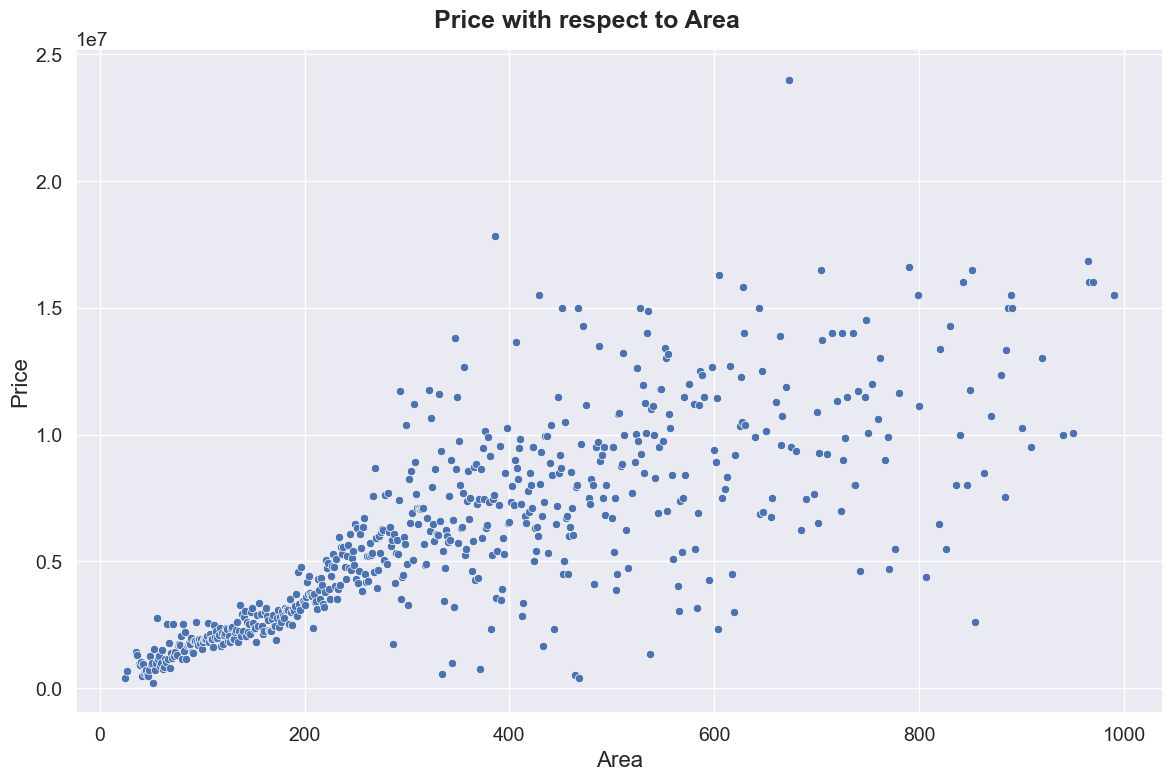

In [22]:
fig = plt.figure(figsize=(12,8))

group_full = df.groupby('Area')['Price'].mean()
group = group_full.reset_index()
group = group[group['Area'] > 0]
group = group[group['Area'] < 2000]

x = group['Area']
y = group['Price']
fig.suptitle('Price with respect to Area', fontsize= 18 , fontweight='bold')
sns.scatterplot(x=x, y=y)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()


c:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


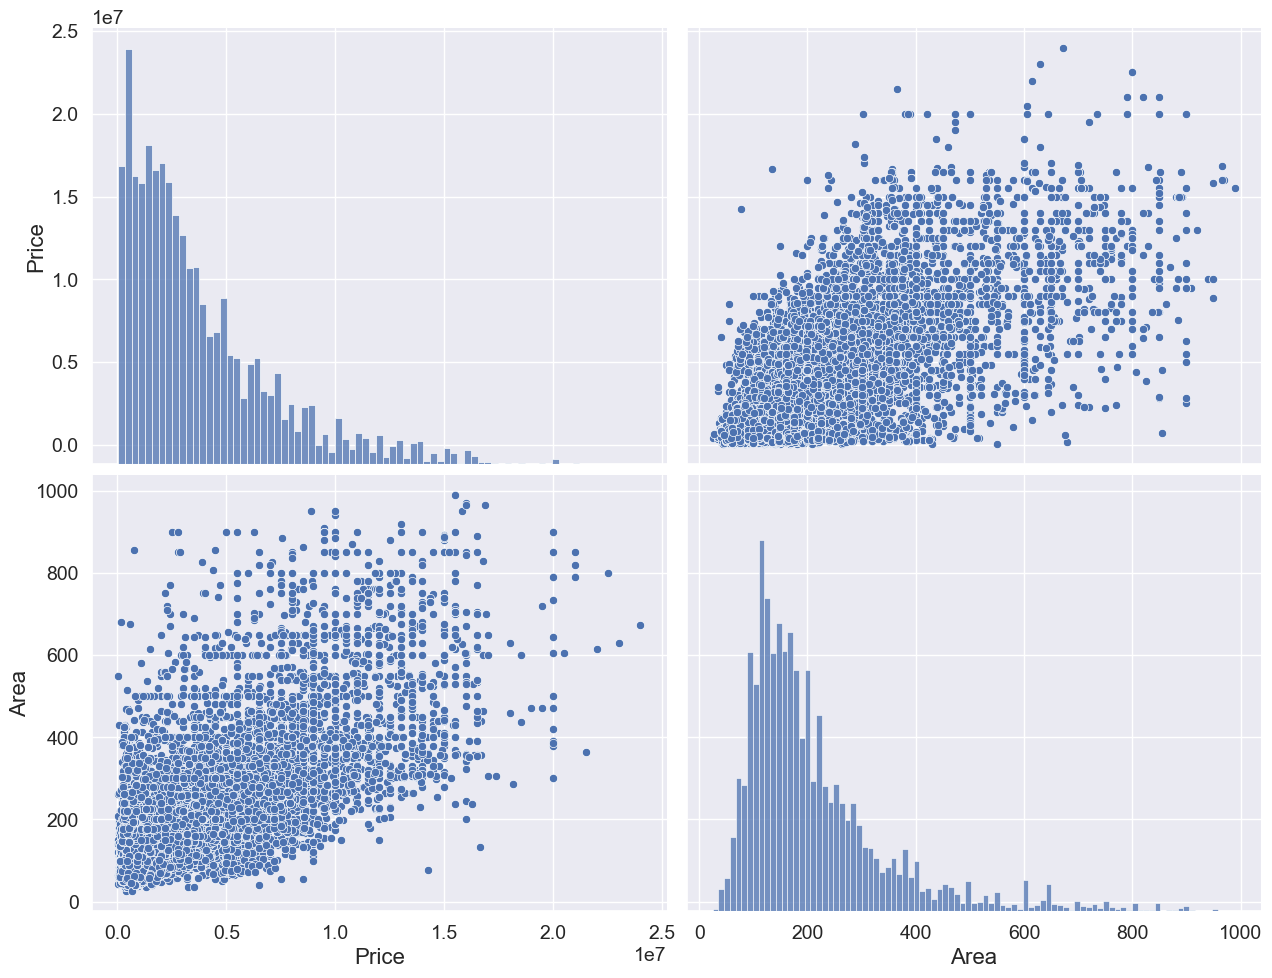

In [23]:
sns.pairplot(df, vars = ['Price', 'Area'], height=5, aspect=1.3);

c:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


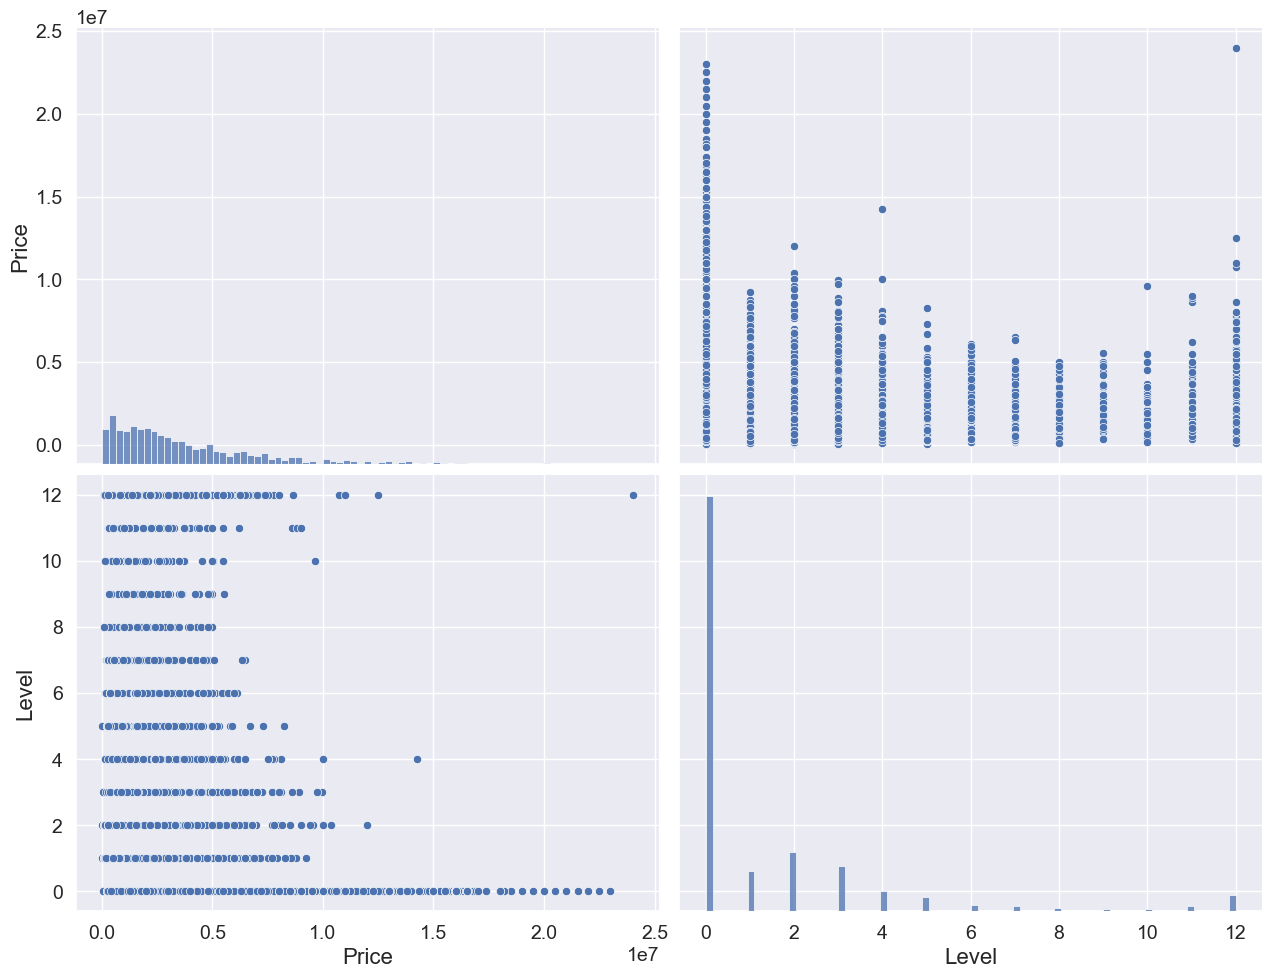

In [24]:
sns.pairplot(df, vars = ['Price', 'Level'], height=5, aspect=1.3);

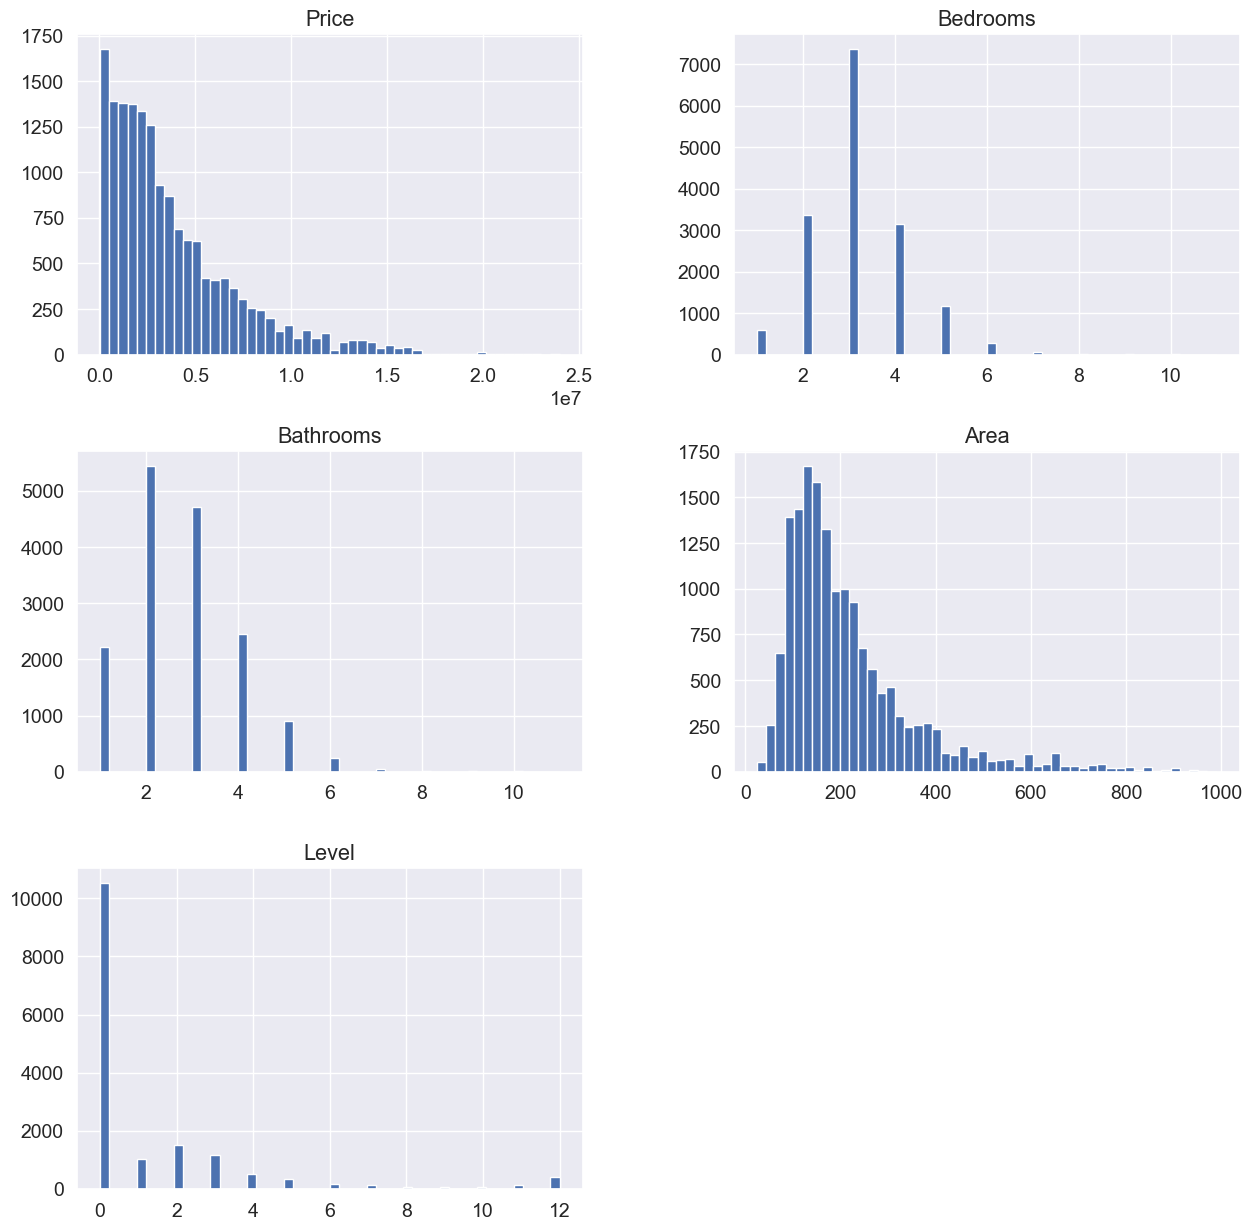

In [25]:
df.hist(bins=50, figsize=(15, 15));

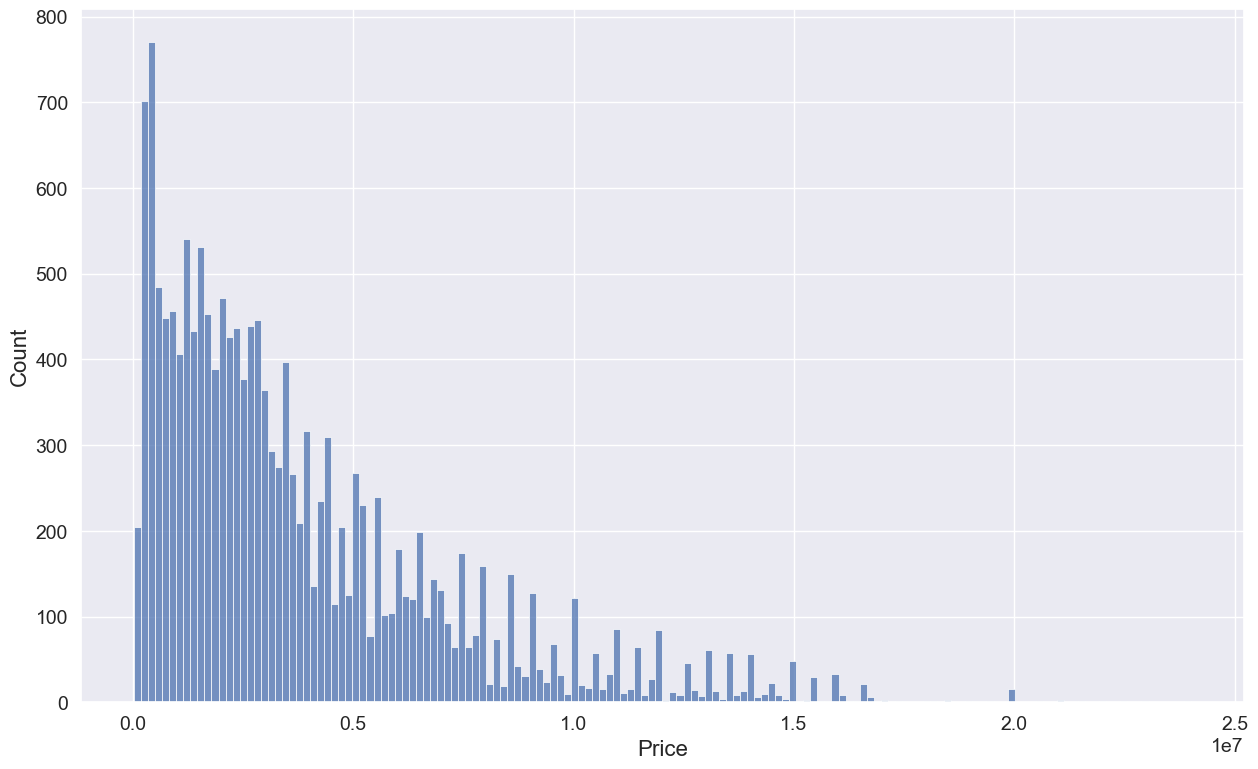

In [26]:
sns.histplot(data=df,x='Price',bins=150);

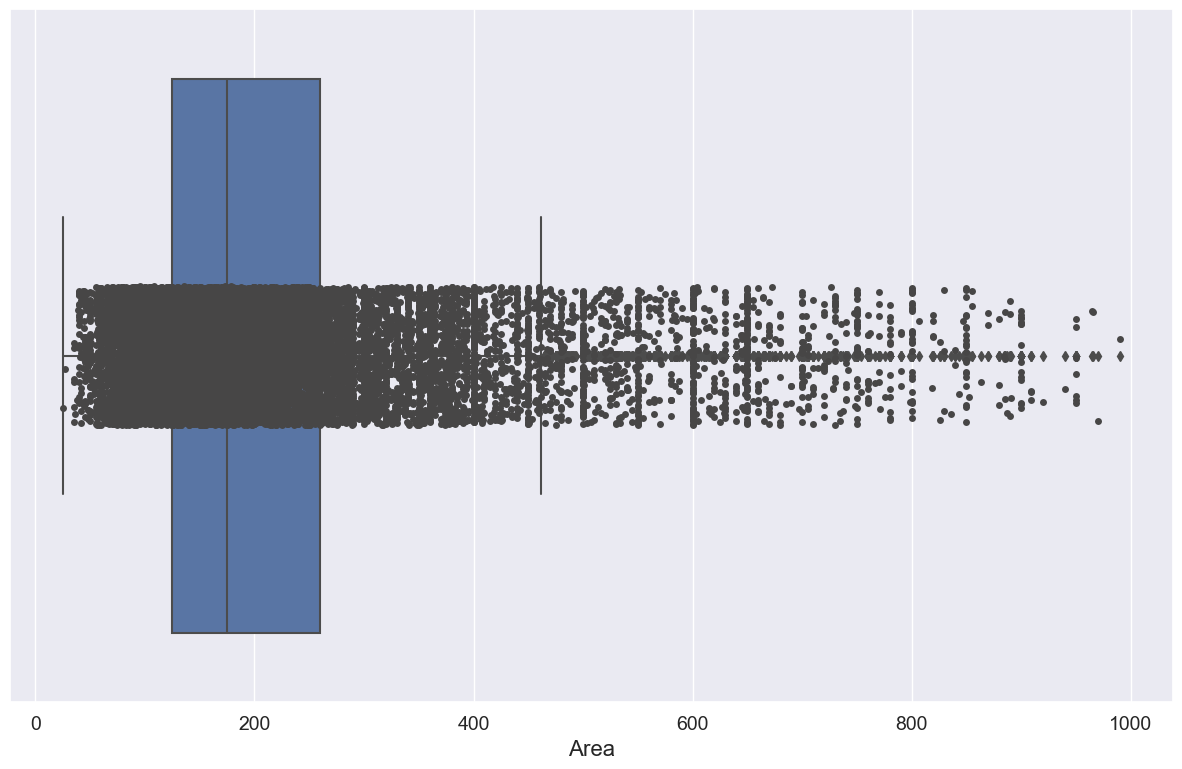

In [27]:
sns.boxplot(x='Area', data=df)
sns.stripplot(x='Area', data=df, color="#474646");

<Axes: xlabel='Area', ylabel='Count'>

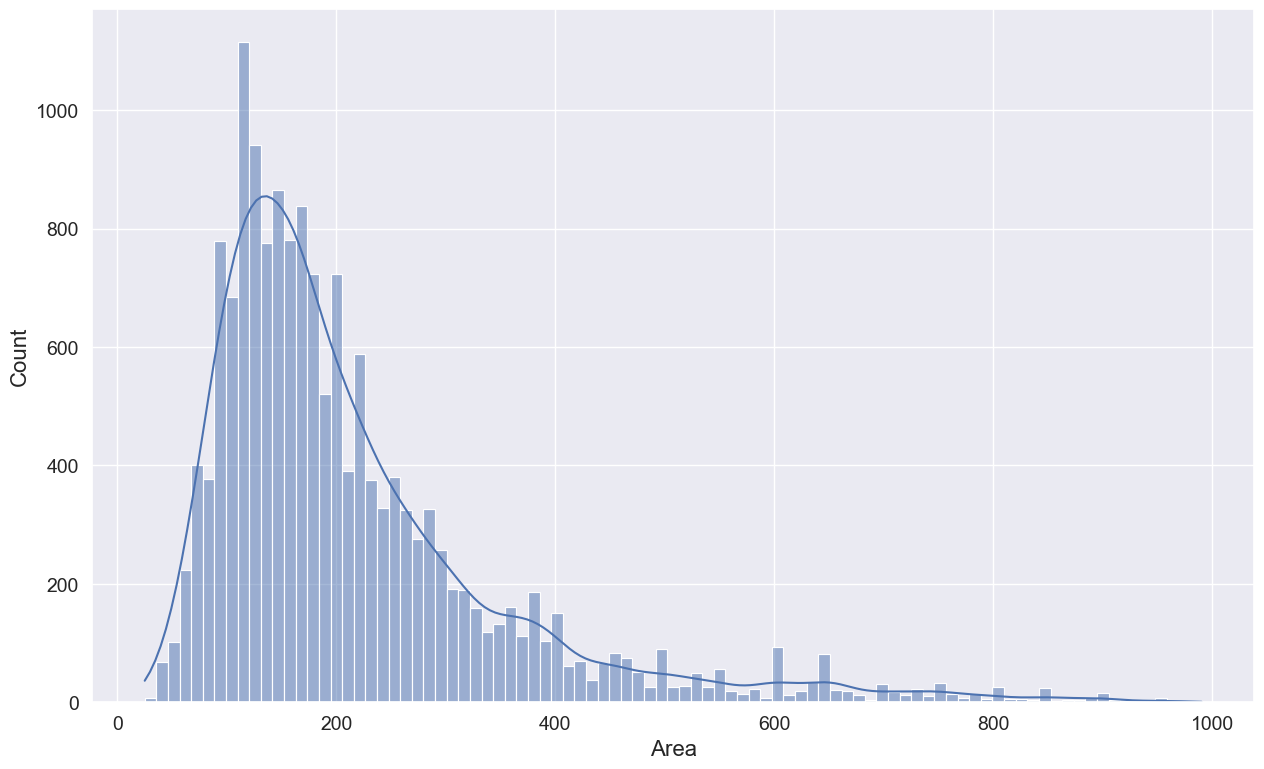

In [28]:
sns.histplot(data = df, x ='Area', kde = True)

In [29]:
def plot_scatter_chart1(df,City):
    fig  = plt.figure(figsize=(10,7))
    bhk2 = df[(df.City==City) & (df.Bedrooms==2)]
    bhk3 = df[(df.City==City) & (df.Bedrooms==3)]
    bhk4 = df[(df.City==City) & (df.Bedrooms==4)]
    plt.rcParams['figure.figsize'] = (14,12)
    sns.scatterplot(x=bhk2.Area,y=bhk2.Price,marker='p',color='blue',label='2 BHK',s=100)
    sns.scatterplot(x=bhk3.Area,y=bhk3.Price,marker='o',color='red',label='3 BHK',s=100)
    sns.scatterplot(x=bhk4.Area,y=bhk4.Price,marker='*',color='green',label='4 BHK',s=300)
    plt.xlabel("Total Square Feet Area", )
    plt.ylabel("Price (Lakhs Indian Rupees)")
    plt.title(City, fontsize = 18, fontweight="bold")
    
    pylab.rcParams.update(rcParams)
    plt.legend(fontsize = 12)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)

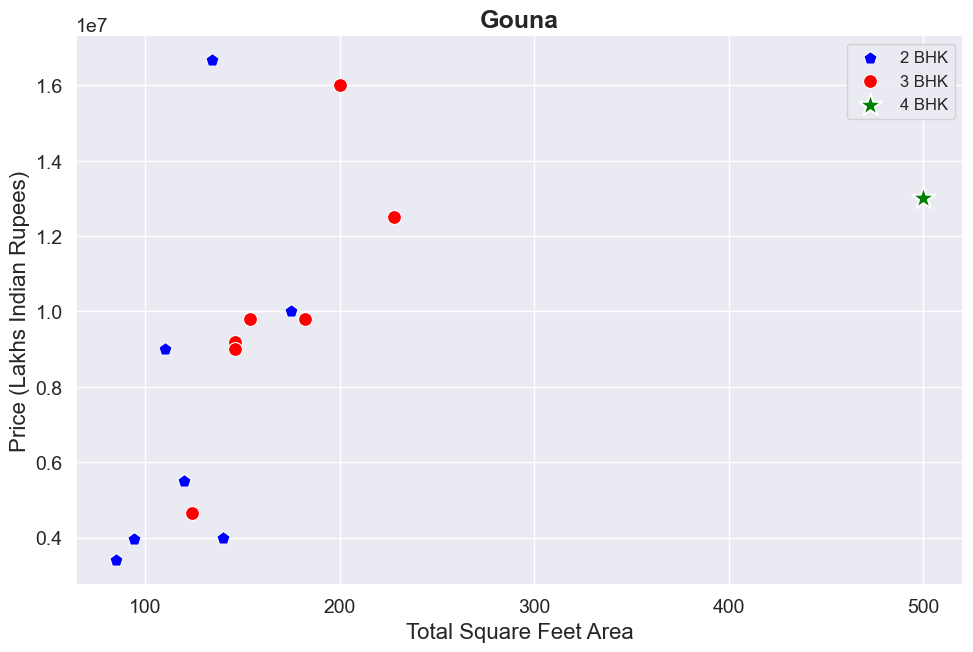

In [30]:
plot_scatter_chart1(df,"Gouna")

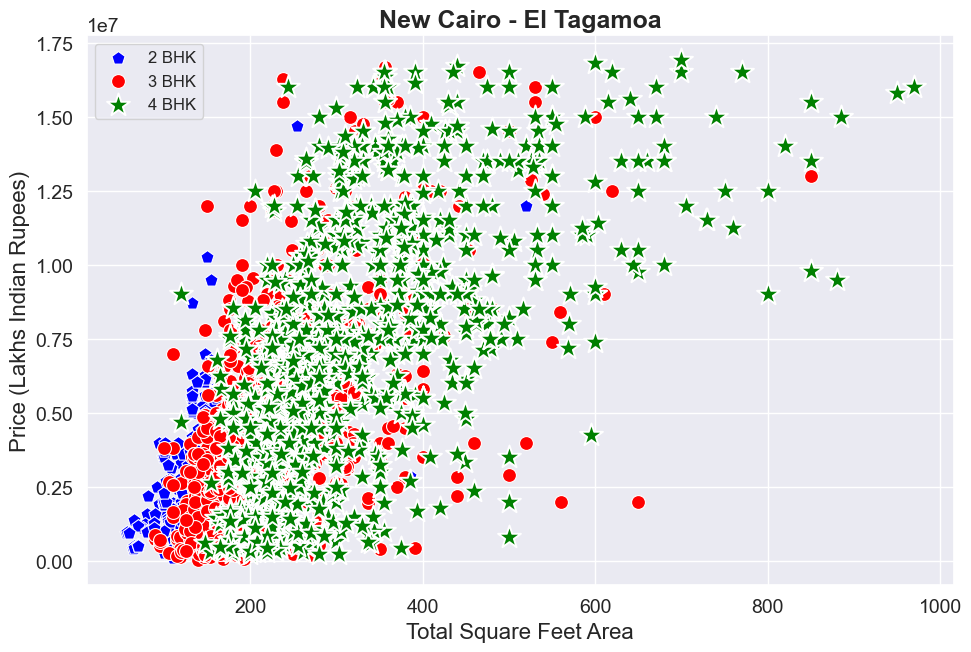

In [31]:
plot_scatter_chart1(df,"New Cairo - El Tagamoa")